## Question 1

A web crawler was created to gather news articles from a variety of websites by using a list of topics and a list of information (such as URL, search URL, and tags) describing each website. Add another record to the website data to enable this crawler to crawl http://www.wcvb.com/
This should be added to the siteRows list of lists. In order to make the output a little easier to read, feel free to remove the other three existing records from this, so that it just contains WCVB data.


In [1]:
class Website:
    'Common base class for all articles/pages'


    def __init__(self, name, url, searchUrl, resultListing, resultUrl, absoluteUrl, pageTitle, pageBody):
        self.name = name
        self.url = url
        self.searchUrl = searchUrl
        self.resultListing = resultListing
        self.resultUrl = resultUrl
        self.absoluteUrl=absoluteUrl
        self.pageTitle = pageTitle
        self.pageBody = pageBody

        
class Content:
    'Common base class for all articles/pages'
    
    def __init__(self, id, topicId, title, body, url):
        self.id = id
        self.topicId = topicId
        self.title = title
        self.body = body
        self.url = url

import requests
from bs4 import BeautifulSoup
import sys
from io import StringIO
import csv

class Crawler:

    #########
    # Prints content
    #########
    def printContent(self, topic, title, body, url):
        print("New article found for: "+topic)
        print(title)
        print(body)


    ################
    # Utilty function used to get a Beautiful Soup object
    # from a given URL
    ##############
    def getPage(self, url):
        print("Retrieving URL:\n"+url)
        session = requests.Session()
        headers = {"User-Agent":"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8"}
        try:
            req = session.get(url, headers=headers)
        except requests.exceptions.RequestException:
            return None
        bsObj = BeautifulSoup(req.text, "lxml")
        return bsObj


    ################
    # Utilty function used to get a content string from a Beautiful Soup
    # object and a selector. Returns an empty string if no object
    # is found for the given selector
    ##############
    def safeGet(self, pageObj, selector):
        childObj = pageObj.select(selector)
        if childObj is not None and len(childObj) > 0:
            return childObj[0].get_text()
        return ""


    ################
    # Searches a given website for a given topic and records all 
    # pages found
    ##############
    def search(self, topic, site):
        bsObj = self.getPage(site.searchUrl+topic)
        searchResults = bsObj.select(site.resultListing)
        for result in searchResults:
            url = result.select(site.resultUrl)[0].attrs["href"]
            #Check to see whether it's a relative or an absolute URL
            if(site.absoluteUrl):
                pageObj = self.getPage(url)
            else:
                pageObj = self.getPage(site.url+url)
            if pageObj == None:
                print("Something was wrong with that page or URL. Skipping!")
            else:
                title = self.safeGet(pageObj, site.pageTitle)
                print("Title is "+title)
                body = self.safeGet(pageObj, site.pageBody)
                if title != "" and body != "":
                    self.printContent(topic, title, body, url)

    ################
    # Starts a search of a given website for a given topic
    ##############
    def crawl(self, topicStr, targetSite):
        self.search(topic, targetSite)

crawler = Crawler()

#build a list of websites to search
#Site row format:
#name,url,searchUrl,resultListingClass,resultUrl,absoluteUrl,pageTitle,pageBody
siteRows = [["WCVB","http://www.wcvb.com/","http://www.wcvb.com/search?q=","div.search-page--result","div.search-page--results-inner a",False,"h1.article-headline--title","div.article-content--body-text"]]

#   ["Frankly Speaking","http://franklyspeakingnews.com","http://franklyspeakingnews.com/?submit=Search&s=", "header.entry-header","h1.entry-title a",True,"h1.entry-title","div.entry-content"],
#   ["Reuters","http://reuters.com","http://www.reuters.com/search/news?blob=","div.search-result-content","h3.search-result-title a",False,"h1","span#article-text"],
#   ["Brookings","http://www.brookings.edu","https://www.brookings.edu/search/?s=","div.list-content article","h4.title a",True,"h1","div.post-body"]

sites = []
for row in siteRows:
    sites.append(Website(row[0], row[1], row[2], row[3], row[4], row[5], row[6], row[7]))

topics = ["obama","trump"]
for topic in topics:
    print("GETTING INFO ABOUT: "+topic)
    for targetSite in sites:
        crawler.crawl(topic, targetSite)






GETTING INFO ABOUT: obama
Retrieving URL:
http://www.wcvb.com/search?q=obama
Retrieving URL:
http://www.wcvb.com//article/president-trump-rolls-back-obama-environmental-regulations/9198675
Title is President Trump Rolls Back Obama Environmental Regulations
New article found for: obama
President Trump Rolls Back Obama Environmental Regulations





Advertisement




Retrieving URL:
http://www.wcvb.com//article/presidents-executive-order-threatens-future-of-national-monuments/9562414
Title is President's executive order threatens future of national monuments
New article found for: obama
President's executive order threatens future of national monuments

WASHINGTON — President Donald Trump will sign an executive order Wednesday directing his interior secretary to review the designation of tens of millions of acres of land as "national monuments."



Advertisement



The action that could upend protections put in place in states across the country as Trump tries to rack up accomplishments 

## Question 2

You are creating a database for an IMDB-like website that holds data about movie industry professionals (actors, actresses, directors, producers, etc) as well as movies, ratings, and awards. Describe, in broad strokes, the database structure (no need to include exact data types and sizes). Detail the indexes (both clustered and secondary) that would be required to efficiently use this database for a consumer website. 

I will use the professionals' name as the secondary so that people can search them by their name. Make their name clustered with alphabetical order will make searching faster and more efficiently. The movies they participated in can be stored as a list of tuple with movie name as string, rating as integer and awards as string.

## Question 3

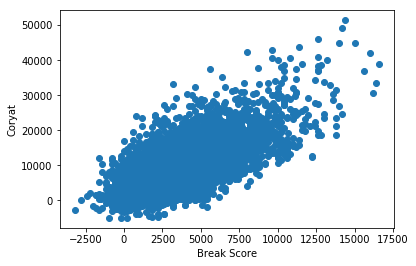

In [12]:
import csv
import matplotlib.pyplot as plt

scores = []
with open('data/jeopardy_scores.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    for row in reader:
        scores.append({"id":int(row[0]), "gameId":int(row[1]), "playerId":int(row[2]), "breakScore":int(row[3]), "round1":int(row[4]), "round2":int(row[5]),"final":int(row[6]),"coryat":int(row[7])})

breakScore = [score['breakScore'] for score in scores]
coryat = [score['coryat'] for score in scores]
plt.scatter(breakScore, coryat)
plt.xlabel("Break Score")
plt.ylabel("Coryat")
plt.show()

## Question 4

Using the same Jeopardy data from question 3 perform some type of simple linear regression. You are free to use any methods you see fit (within the bounds of good statistical propriety) to filter or manipulate the data to produce an interesting result. 

Hint 1: Remember that LinearRegression takes an unusual input format for the X data. [[feature1_row1, feature2_row1, feature3_row1], [feature1_row2, feature2_row2, feature3_row2],[feature1_row3, feature2_row3, feature3_row3],...]

Hint 2: You can use "myLinRegInstance.score(X, y)" for a measure of goodness of fit.

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import numpy as np
import csv
import matplotlib.pyplot as plt

scores = []
with open('data/jeopardy_scores.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    for row in reader:
        scores.append({"id":int(row[0]), "gameId":int(row[1]), "playerId":int(row[2]), "breakScore":int(row[3]), "round1":int(row[4]), "round2":int(row[5]),"final":int(row[6]),"coryat":int(row[7])})

breakScore = [score['breakScore'] for score in scores]
coryat = [score['coryat'] for score in scores]
breakScore = np.reshape(breakScore, (len(breakScore),1))
coryat = np.reshape(coryat, (len(coryat),1))
x_train, x_test, y_train, y_test = train_test_split(breakScore, coryat, test_size = 0.2)
LinReg = LinearRegression()
LinReg.fit(x_train,y_train)
print(LinReg.score(x_test,y_test))

0.374071242326


## Question 5 

### Do EITHER 5 or 6. If you feel inspired to do both (hey, clustering and classifications are fun!) up to 5 points extra credit, but I'm seriously not expecting it. 

Clustering of Shakespeare plays. Are there noticable clusters in the time period, or play type?

<b>For reference only</b> (this will not work if you try to run it) here is the code that prints the original MySQL tables to CSV data


In [ ]:
import csv
import pymysql

class Database:

    def __init__(self):
        self.conn = pymysql.connect(host='127.0.0.1', unix_socket='/tmp/mysql.sock', user='root', passwd='root', db='mysql', charset='utf8')
        self.cur = self.conn.cursor(pymysql.cursors.DictCursor)
        self.cur.execute("USE shakespeare")

db = Database()
#This table is called "sentences" not "lines" because "lines" is a MySQL reserved word.
db.cur.execute("SELECT * FROM sentences")
lineWriter = csv.writer(open("lines.csv", "w"))
lines = []
for row in db.cur:
    lineWriter.writerow([row["id"], row["sceneId"], row["characterId"], row["lineText"]])

db.cur.execute("SELECT * FROM characters")
characterWriter = csv.writer(open("characters.csv", "w"))
for row in db.cur:
    characterWriter.writerow([row["id"], row["playId"], row["name"]])

db.cur.execute("SELECT * FROM plays")
playWriter = csv.writer(open("plays.csv", "w"))
for row in db.cur:
    playWriter.writerow([row["id"], row["title"], row["urlkey"], row["type"]])

db.cur.execute("SELECT * FROM scenes")
sceneWriter = csv.writer(open("scenes.csv", "w"))
for row in db.cur:
    sceneWriter.writerow([row["id"], row["playId"], row["act"], row["scene"], row["title"]])



Provided below is code that reads in the CSV files, combines them into relational dictionaries, and provides convenience functions such as graphing by cluster and cleaning lines. Provided also is a sample KMeans clustering function. 
Although we are performing clustering across thousands of dimensions, the cluster labels do not necessarily have to be displayed in a visualization that replicates the dimensions considered for the cluster. In this case, we are plotting along "type of play" and "year written" (feel free to modify this for other metrics!) 

How might this clustering be improved? Did Shakespeare's writing change over time?

Hint: The patterns here may be subtle. You may need an efficient way to go through a large number of clustering algorithms and print out a large number of plots for side-by-side analysis.

In [ ]:
import csv
import string

import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

from collections import defaultdict

def cleanLine(line):
    line = line.replace("'", "")
    line = line.lower()
    for punctuation in string.punctuation:
        line = line.replace(punctuation, ' '+punctuation+' ')
    textArray = line.split()
    return ' '.join(textArray)


def graphCluster(array1, array2, labels):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    print(labels)
    plt.scatter(array1, array2, color=[colors[label] for label in labels])
    plt.show()
    plt.clf()

plays = {}
with open('data/plays.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        plays[int(row[0])] = {"id":int(row[0]), "title":row[1], "urlkey":row[2], "type":row[3],"year":row[4]}

characters = {}
with open('data/characters.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        characters[int(row[0])] = {"play":plays[int(row[1])], "name":row[2]}

scenes = {}
with open('data/scenes.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        scenes[int(row[0])] = {"play":plays[int(row[1])], "act":row[2], "scene":row[3], "title":row[4]}

lines = []
with open('data/lines.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        lines.append({"id": row[0], "scene":scenes[int(row[1])], "character":characters[int(row[2])], "text":cleanLine(row[3])})

for i in range(10):
    print(lines[i])

def linesByPlay(lines):
    linesByPlay = defaultdict(list)

    for line in lines:
        linesByPlay[line["scene"]["play"]["id"]].append(line["text"])

    #Return a list of play titles and associated 'blobs of text' for each play
    return [playId for playId in linesByPlay], [" ".join(linesByPlay[playId]) for playId in linesByPlay]

playIds, bigBlobsOfLines = linesByPlay(lines)

vect = CountVectorizer(min_df=10, stop_words="english")
X = vect.fit_transform(bigBlobsOfLines)

kmeans = KMeans(n_clusters=4)
kmeans.fit_transform(X)
typeToInt = {"TRAGEDY":1,"COMEDY":2,"HISTORY":3,"POETRY":4}

#Graph play year vs play type, color-coded by cluster
graphCluster([int(plays[playId]["year"]) for playId in playIds], [typeToInt[plays[playId]["type"]] for playId in playIds], kmeans.labels_)
print(kmeans.score(X))

## Question 6

### Do EITHER 5 or 6. If you feel inspired to do both (hey, clustering and classifications are fun!) up to 5 points extra credit, but I'm seriously not expecting it. 

Create a classifier that predicts whether a work of Shakespeare is a comedy, tragedy, or history. Because the poems are significantly different than the other play types, you may or may not choose to exclude those from the classification.

Provided below is code that reads in the CSV files (see above for the reference code that created the CSV files), combines them into relational dictionaries, and provides convenience functions such as graphing by cluster and cleaning lines. Provided also is a sample KNN clustering function.

Hint: This is a situation in which you only have 36 plays to work with. Although there is a lot of data associated with each play, the number of actual data points are very few. It is likely, for example, that in your test train split, you won't get any of a particular type in the "test" data. Consider your approach.

{'id': '1', 'scene': {'scene': '1', 'play': {'year': '1602', 'id': 1, 'title': "All's Well That Ends Well", 'type': 'COMEDY', 'urlkey': 'allswell'}, 'act': '1', 'title': "SCENE I. Rousillon. The COUNT's palace."}, 'character': {'play': {'year': '1602', 'id': 1, 'title': "All's Well That Ends Well", 'type': 'COMEDY', 'urlkey': 'allswell'}, 'name': 'COUNTESS'}, 'text': 'in delivering my son from me , i bury a second husband .'}
{'id': '2', 'scene': {'scene': '1', 'play': {'year': '1602', 'id': 1, 'title': "All's Well That Ends Well", 'type': 'COMEDY', 'urlkey': 'allswell'}, 'act': '1', 'title': "SCENE I. Rousillon. The COUNT's palace."}, 'character': {'play': {'year': '1602', 'id': 1, 'title': "All's Well That Ends Well", 'type': 'COMEDY', 'urlkey': 'allswell'}, 'name': 'BERTRAM'}, 'text': 'and i in going , madam , weep oer my fathers death anew : but i must attend his majestys command , to whom i am now in ward , evermore in subjection .'}
{'id': '3', 'scene': {'scene': '1', 'play': {'y

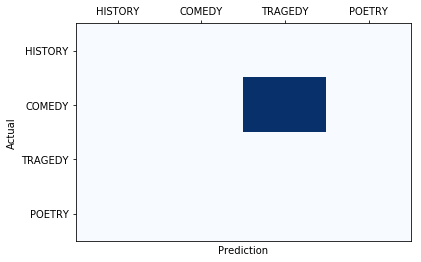

In [5]:
import csv
import string

import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

from collections import defaultdict
import numpy as np

def cleanLine(line):
    line = line.replace("'", "")
    line = line.lower()
    for punctuation in string.punctuation:
        line = line.replace(punctuation, ' '+punctuation+' ')
    textArray = line.split()
    return ' '.join(textArray)


def makeHeatMap(predictions, actual, subjects):
    actual = np.array(actual)
    column_labels = subjects
    row_labels = subjects
    data = np.zeros((len(subjects), len(subjects)))
    for i in range(len(predictions)):
        if predictions[i] and actual[i]:
            if predictions[i] != actual[i]:
                predIndex = subjects.index(predictions[i])
                actIndex = subjects.index(actual[i])
                data[predIndex][actIndex] += 1

    #data = np.random.rand(4,4)
    fig, ax = plt.subplots()
    heatmap = ax.pcolor(data, cmap=plt.cm.Blues)

    # put the major ticks at the middle of each cell
    ax.set_xticks(np.arange(data.shape[0])+0.5, minor=False)
    ax.set_yticks(np.arange(data.shape[1])+0.5, minor=False)

    # want a more natural, table-like display
    ax.invert_yaxis()
    ax.xaxis.tick_top()

    ax.set_xticklabels(row_labels, minor=False)
    ax.set_yticklabels(column_labels, minor=False)
    plt.xlabel("Prediction")
    plt.ylabel("Actual")
    plt.show()


plays = {}
with open('data/plays.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        plays[int(row[0])] = {"id":int(row[0]), "title":row[1], "urlkey":row[2], "type":row[3],"year":row[4]}

characters = {}
with open('data/characters.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        characters[int(row[0])] = {"play":plays[int(row[1])], "name":row[2]}

scenes = {}
with open('data/scenes.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        scenes[int(row[0])] = {"play":plays[int(row[1])], "act":row[2], "scene":row[3], "title":row[4]}

lines = []
with open('data/lines.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        lines.append({"id": row[0], "scene":scenes[int(row[1])], "character":characters[int(row[2])], "text":cleanLine(row[3])})

for i in range(10):
    print(lines[i])

def linesByPlay(lines):
    linesByPlay = defaultdict(list)

    for line in lines:
        linesByPlay[line["scene"]["play"]["id"]].append(line["text"])

    #Return a list of play titles and associated 'blobs of text' for each play
    return [playId for playId in linesByPlay], [" ".join(linesByPlay[playId]) for playId in linesByPlay]

playIds, bigBlobsOfLines = linesByPlay(lines)
playTypes = [plays[playId]["type"] for playId in playIds]

vect = CountVectorizer(min_df=10, stop_words="english")
X = vect.fit_transform(bigBlobsOfLines)

X_train, X_test, y_train, y_test = train_test_split(X, playTypes, random_state=0)


dt = DecisionTreeClassifier(max_depth=20)

dt.fit(X_train, y_train)
print(dt.score(X_test, y_test))
makeHeatMap(dt.predict(X_test), y_test, ["HISTORY","COMEDY","TRAGEDY","POETRY"])




I used the decision tree classifier and changed max tree depth to improve prediction accuracy.

## Question 7

<b>A.</b> Using the Jeopardy data from question 3, perform a logistic regression to determine whether or not a player wins the game based on either first break scores, or end of round1 scores. 
Create an ROC curve for this logistic regression and give a personal opinion (backed up by the curve and its sensitivity/recall) about how good the logistic regression is. What would you recommend as a score threshold for the best prediction as to 'whether a player will win the game or not'?

<b>B.</b> The problem in part A is a subtle variation on a more traditional logistic regression problem. If two players both have scores of $20,000 at the end of the first round, the statistics indicate that they are both likely to win. However, <a href="https://www.youtube.com/watch?v=sqcLjcSloXs" target="_blank">there can be only one</a>. Does looking at the differences in player scores improve your ability to make a definitive statement about the game? ("Yes that person will definitely win" or "It's anyone's game")


Score is 0.67158108795119476
Precision is array([ 0.33587786,  0.33571065,  0.33605303,  0.33639612,  0.33691207,
        0.33725691,  0.33864337,  0.33916624,  0.34021683,  0.34145078,
        0.34312697,  0.34424498,  0.34889962,  0.35149864,  0.35951835,
        0.36465062,  0.37262124,  0.38010204,  0.38543754,  0.39060309,
        0.39684921,  0.40644654,  0.41252144,  0.41765241,  0.42741935,
        0.43099788,  0.44103774,  0.43835616,  0.44864865,  0.4566474 ,
        0.47181965,  0.47554806,  0.47466216,  0.48380952,  0.486     ,
        0.48873874,  0.48820755,  0.50131926,  0.5013624 ,  0.50759878,
        0.50161812,  0.52205882,  0.51320755,  0.53303965,  0.53097345,
        0.55276382,  0.55612245,  0.55882353,  0.55621302,  0.56578947,
        0.56291391,  0.56589147,  0.59433962,  0.59047619,  0.61363636,
        0.66197183,  0.66666667,  0.67741935,  0.67272727,  0.68518519,
        0.73333333,  0.76470588,  0.77777778,  0.7826087 ,  0.75      ,
        0.8       ,  0

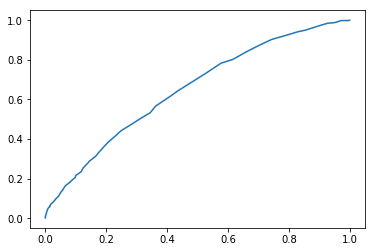

In [62]:
import csv
import matplotlib.pyplot as plt
from collections import defaultdict

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve


scores = []
with open('data/jeopardy_scores.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    for row in reader:
        scores.append({"id":int(row[0]), "gameId":int(row[1]), "playerId":int(row[2]), "breakScore":int(row[3]), "round1":int(row[4]), "round2":int(row[5]),"final":int(row[6]),"coryat":int(row[7])})


scoresByGame = defaultdict(list)
for score in scores:
    scoresByGame[score["gameId"]].append(score)
    
winningScores = []
losingScores = []
for gameId in scoresByGame:
    winner = max(scoresByGame[gameId], key=lambda x:x['final'])
    scoresByGame[gameId].remove(winner)
    runnerUp = max(scoresByGame[gameId], key=lambda x:x['final'])

    scoresByGame[gameId].remove(runnerUp)
    #Add both runner up and the loser to losingScores
    losingScores.append(runnerUp)
    
    #Should be equivalent to losingScores.append(scoresByGame[gameId][0]), but this is protection against odd data
    losingScores += [x for x in scoresByGame[gameId]]
    winningScores.append(winner)

LogReg = LogisticRegression()

breakScore = []
breakScore = np.append(breakScore,[score['breakScore'] for score in winningScores])
breakScore = np.append(breakScore,[score['breakScore'] for score in losingScores])
totalResult = []
totalResult = np.append(totalResult,[True for score in winningScores])
totalResult = np.append(totalResult,[False for score in losingScores])

breakScore = np.reshape(breakScore, (len(breakScore),1))
x_train, x_test, y_train, y_test = train_test_split(breakScore, totalResult,test_size=0.2,random_state=24)
LogReg.fit(x_train,y_train)
preds = LogReg.predict_proba(x_test)[:,1]
falsePos, truePos, _ = roc_curve(y_test, preds)
precision, recall, threshold = precision_recall_curve(y_test, preds)
print("Score is %r"%LogReg.score(x_test,y_test))
print("Precision is %r"%precision)
print("Threshold is %r"%threshold)
plt.plot(falsePos,truePos)
plt.show()

The ROC curve for this logistic regression is not very good because it looks almost linear and does not reach high true positive quickly. I think the threshold of 0.86 is very good because it predicts every case correctly and the precision rate jumps by about 0.2 at that threshold.